<a href="https://colab.research.google.com/github/GGMmattos/Machine-Learning-And-Data-Science/blob/main/Prevendo_o_Sal%C3%A1rio_com_Base_nas_Horas_de_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projeto busca prever o salário de determinado indivíduo tendo como base a quantidade de hora de estudo que o mesmo realizou por mês.

In [1]:
#importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Carregamento dos dados

In [2]:
data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso DSA/Projetos/arquivos/dataset.csv')

Verificando a quantidade de linhas e colunas do dataset

In [3]:
data_frame.shape

(500, 2)

Verificando as colunas presente na base

In [4]:
data_frame.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
data_frame.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


Executando o comando a baixo é possível verificar que o dataset não possui valores nulos, e que esses valor são do tipo ponto flutuante (float).

Caso apresentasse valores nulos os mesmo teriam que ser tratados.

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Análise Exploratória - Resumo Estatístico

In [7]:
#Verifica se há valores ausentes
data_frame.isnull().sum()

,0
horas_estudo_mes,0
salario,0


Com o coeficiente de correlação é um coeficiente que vai de -1 a +1, sendo que, próximo de -1 forte correlação negativa, próximo de +1 forte correlação positiva e 0 correspode a não correlação entre as variáveis

In [8]:
#Correlação
data_frame.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Neste problema a variável de entrada e a horas de estudo ao mês e a de saída o salário, por meio da tabela gerada a abaixo podemos ver a forte correlação positiva, ou seja, quanto maior a hora de estudo ao mês maior o salário do indivíduo.

Vale a pena salientar que neste projeto a variável preditiva é **horas_estudo_mes** e a variável alvo **salario**

In [9]:
#Resumo estatistico do dataset
data_frame.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [10]:
#Resumo estatistico da variável preditora
data_frame['horas_estudo_mes'].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


**Análise do histograma na variável preditora**

Apresenta o comportamento esperado para cada variável de entrada.

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

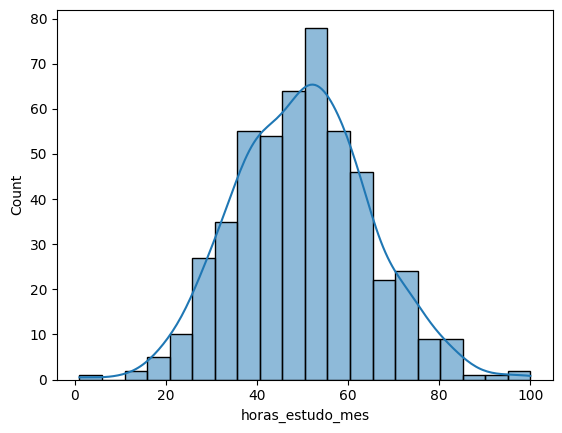

In [11]:
#Histograma da variável preditora
sns.histplot(data = data_frame, x = "horas_estudo_mes", kde = True)

#Preparação dos dados

Neste projeto, X é representado como sendo a variável de entrada e y a variável de saída. Convensão comumente utilizada.

In [12]:
#Prepara a variável de entrada X. O algoritmo que vamos utilizar espera que os dados de entrada sejam array numpy
X = np.array(data_frame['horas_estudo_mes'])

In [16]:
type(X)

numpy.ndarray

In [18]:
#Ajusta o shape de X
X = X.reshape(-1, 1)

In [24]:
#Prepara a variável alvo
y = data_frame['salario']

**Gerando grafico de dispersão monstrando a relação entre as duas variáveis**

Assim é possível ver que ao aumentar a variável X que é o tempo de estuda, é aumentado a variável Y que é referente ao salário, indicando a correlação positiva. Quanto mais tempo a pessoa estuda, maior o salário.

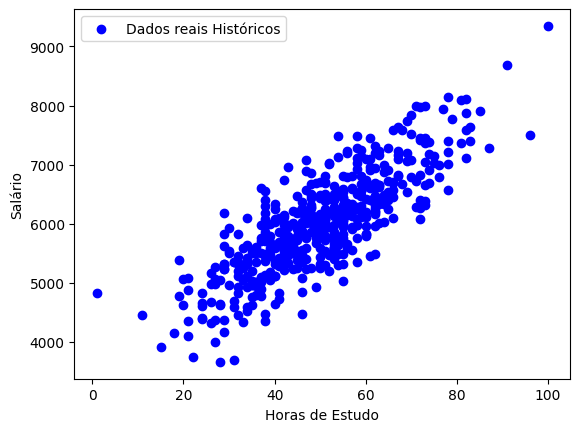

In [26]:
#Grafico  de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

**Dividindo os dados em treinamento e teste**

Aqui repartimos o conjunto de dados entre teste e treinamento

In [27]:
#Configuração do tamanho da partição de teste, sendo 20% da base de dados e 80% restante para treino que será escolhido de forma aleatória.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X_treino.shape

(400, 1)

In [29]:
X_teste.shape

(100, 1)

In [30]:
y_treino.shape

(400,)

In [31]:
y_teste.shape

(100,)

#Modelagem preditiva (Machine Learning)

Neste projeto utilizaremos o algoritmo de regressão linear, qué é um algoritmo supervisionado de machine learning usado para estimar o valor de algo baseado em uma série de outros dados históricos e se encaixa perfeitamente em nosso caso.

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

In [32]:
#Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [33]:
#Realiza o treinamento do modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

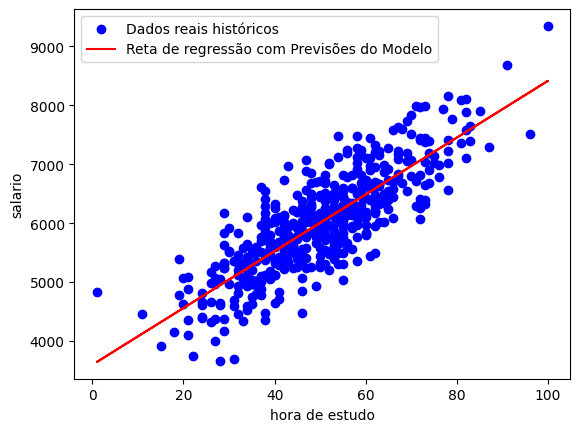

In [35]:
#Visualiza a reta de regressão linear (previsões) e os dados reais usandos no treinamento
plt.scatter(X, y, color = 'blue', label = 'Dados reais históricos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'Reta de regressão com Previsões do Modelo')
plt.xlabel('hora de estudo')
plt.ylabel('salario')
plt.legend()
plt.show()

In [56]:
previsoes = modelo.predict(X_teste)


In [57]:
previsoes

array([7114.05897669, 7114.05897669, 7547.69565163, 5475.87598246,
       5909.5126574 , 6873.14971283, 6150.42192126, 6439.51303789,
       6246.7856268 , 5957.69451017, 6391.33118512, 6150.42192126,
       5234.9667186 , 5427.69412969, 6343.14933234, 6680.42230174,
       6391.33118512, 5572.239688  , 6487.69489066, 6102.24006849,
       6005.87636294, 7065.87712392, 6102.24006849, 6005.87636294,
       6054.05821572, 6054.05821572, 5861.33080463, 6824.96786006,
       5716.78524632, 6728.60415452, 5813.14895186, 5427.69412969,
       6294.96747957, 6246.7856268 , 6487.69489066, 5524.05783523,
       6391.33118512, 6246.7856268 , 8414.96900152, 5138.60301306,
       5475.87598246, 5764.96709909, 4994.05745474, 6535.87674343,
       5234.9667186 , 5813.14895186, 6343.14933234, 5668.60339354,
       5475.87598246, 6054.05821572, 5957.69451017, 5234.9667186 ,
       6054.05821572, 6535.87674343, 5090.42116029, 6680.42230174,
       6391.33118512, 5331.33042414, 4994.05745474, 6054.05821

In [58]:
y_teste = np.array(y_teste)
y_teste

array([6392., 7040., 7583., 5480., 6107., 7591., 6262., 7247., 5315.,
       5829., 5985., 6447., 4520., 5491., 5951., 6995., 6259., 5869.,
       6634., 6423., 6104., 6079., 6189., 5584., 6168., 6715., 6170.,
       6802., 5239., 6733., 4855., 6175., 5660., 6064., 5801., 5116.,
       7482., 6259., 9348., 4937., 5791., 5917., 4371., 6906., 4594.,
       6185., 6813., 5625., 5590., 5719., 6113., 4938., 6815., 6396.,
       5358., 6494., 6285., 5350., 4172., 5311., 6649., 4830., 7369.,
       6126., 5072., 5862., 6876., 5939., 6333., 6604., 6331., 6537.,
       5426., 6065., 6195., 5783., 5337., 5324., 5959., 6570., 7487.,
       7416., 5038., 5779., 7155., 6086., 6811., 6202., 7323., 6013.,
       5285., 5270., 6674., 5027., 5391., 6178., 6470., 5494., 4822.,
       5978.])

**Validação do modelo**

A taxa R^2 também checida como coeficiente de determinação indica o quão bem o  modelo está explicando as variações dos dados.

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

# Supondo que y_teste e previsoes são contínuos
r2 = r2_score(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)

print(f"R²: {r2}")

R²: 0.5939334693606823


Com isso podemos concluir que o modelo possui desempenho razoável. Tal resultado pode ser melhorado alterando os parametros do algoritmo de aprendizagem de máquina por exemplo.

#Deploy do modelo

In [48]:
#Define um novo valor para as horas de estudo
horas_estudo_novo = np.array([[48 ]])

#Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de {horas_estudo_novo} horas por mês seu salário pode ser igual a {salario_previsto}')

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


#Conclusão

O objetivo deste projeto foi prever o salario baseado nas horas de estudo ao mês. Analisando o dataset foi notado que quanto mais determinado indivíduo estuda por mês maior será seu salário para grande maioria dos casos.

Avaliando o modelo notamos que o mesmo possuiu um bom resultado mas que pode ser melhorado mudando os parâmetros do algoritmo, por exemplo, ou até mesmo explorando outros algoritmo para a previsão.